# Imports

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import sqlite3
sns.set(rc= {'figure.figsize' :[15,9]} ,font_scale=1.3)

# Read Data

In [177]:
data=pd.read_csv("D:\VIF\Materials\Second Year\Training\Last Assignment\supermarket_sales - Sheet1.csv")

# Show important info

In [178]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [180]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# Rename column

In [181]:
data = data.rename(columns={'Product line': 'Product_line'})
data = data.rename(columns={'Customer type': 'Customer_type'})

In [182]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [183]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer_type               object
Gender                      object
Product_line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

# change time from object to DateTime

In [184]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.time

In [185]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Weekday'] = data['Date'].dt.day_name()

In [186]:
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour

In [187]:
data['Avg_price_per_unit'] = data['Total'] / data['Quantity']

# Save Data to a CSV File

In [188]:
# Save the DataFrame to a CSV file
data.to_csv('D:\VIF\Materials\Second Year\Training\Last Assignment\modified_supermarket_sales.csv', index=False)

# 
# Performing Visualization
# 

<AxesSubplot:xlabel='City', ylabel='count'>

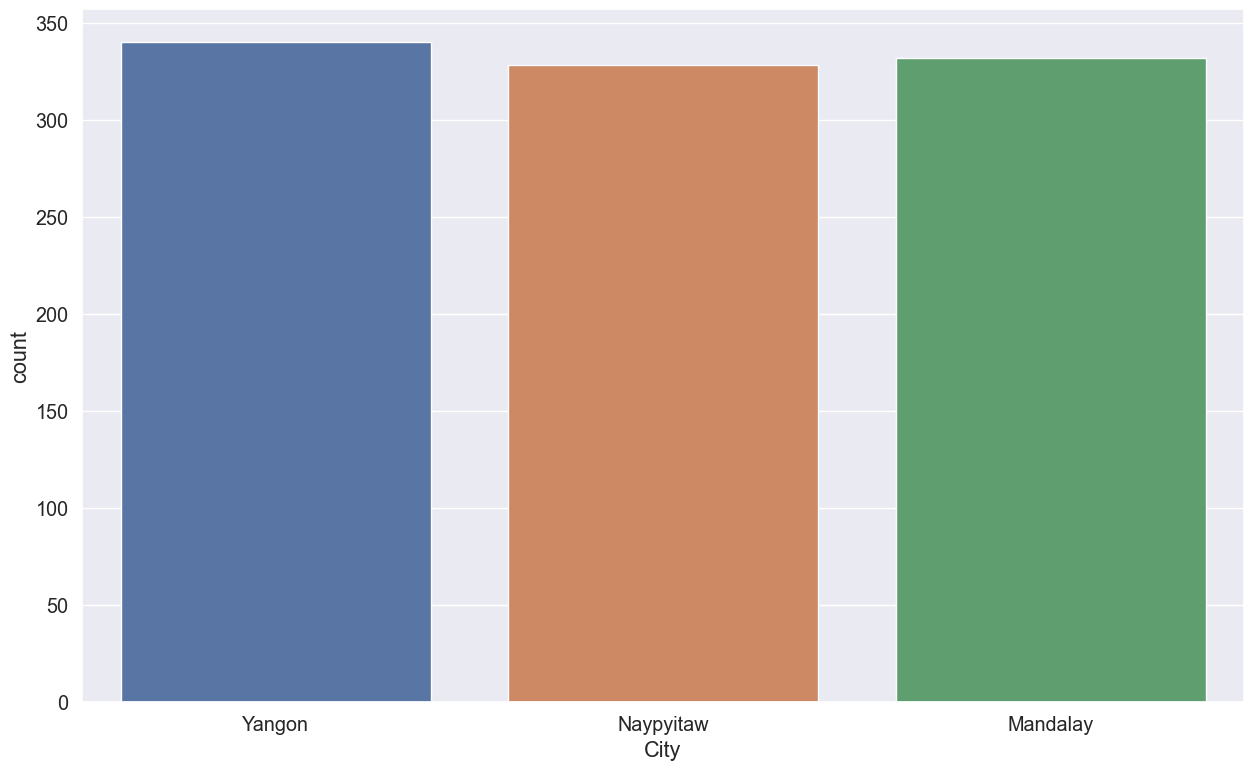

In [189]:
#the number of invoices in each city(branch)
sns.countplot(x='City', data=data)

<AxesSubplot:xlabel='Product_line', ylabel='count'>

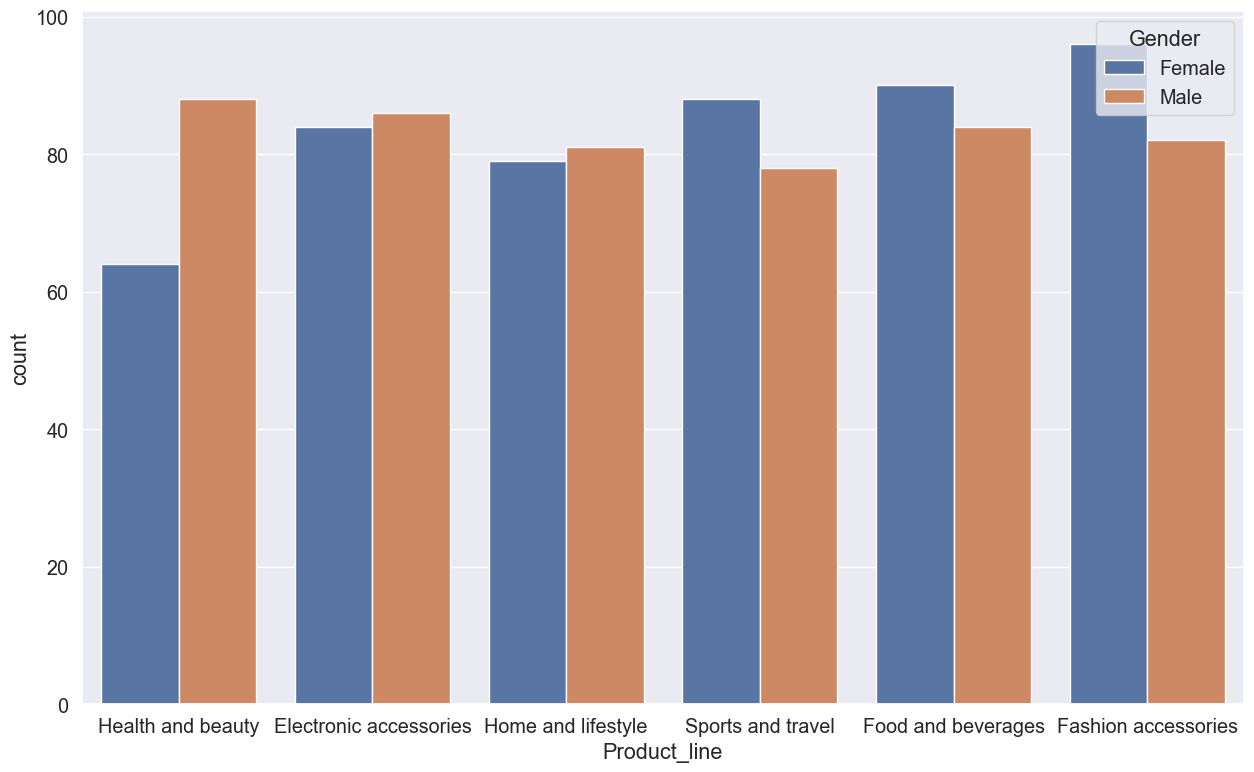

In [190]:
# how much every gender buys from each product type
sns.countplot(x='Product_line', hue='Gender', data=data)

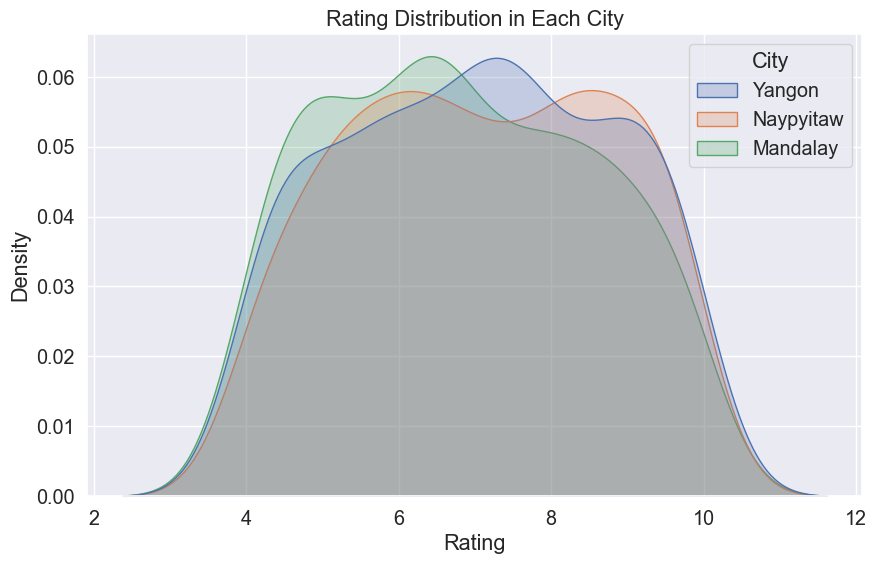

In [191]:
city_mapping = {'A': 'Naypyitaw', 'B': 'Yangon', 'C': 'Mandalay'}

data['City'] = data['City'].replace(city_mapping)

plt.figure(figsize=(10,6))

branch_payment_pivot.index = branch_payment_pivot.index.map(city_mapping)

sns.kdeplot(data=data, x='Rating', hue='City', fill=True)

plt.title('Rating Distribution in Each City')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()


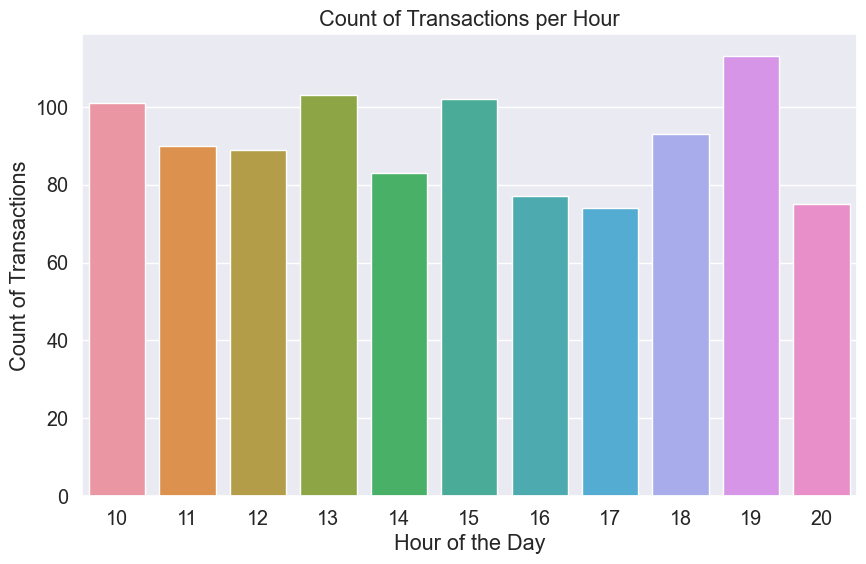

In [192]:
data['Hour'] = data['Time'].apply(lambda x: x.hour)

plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=data)
plt.title('Count of Transactions per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=0)
plt.show()

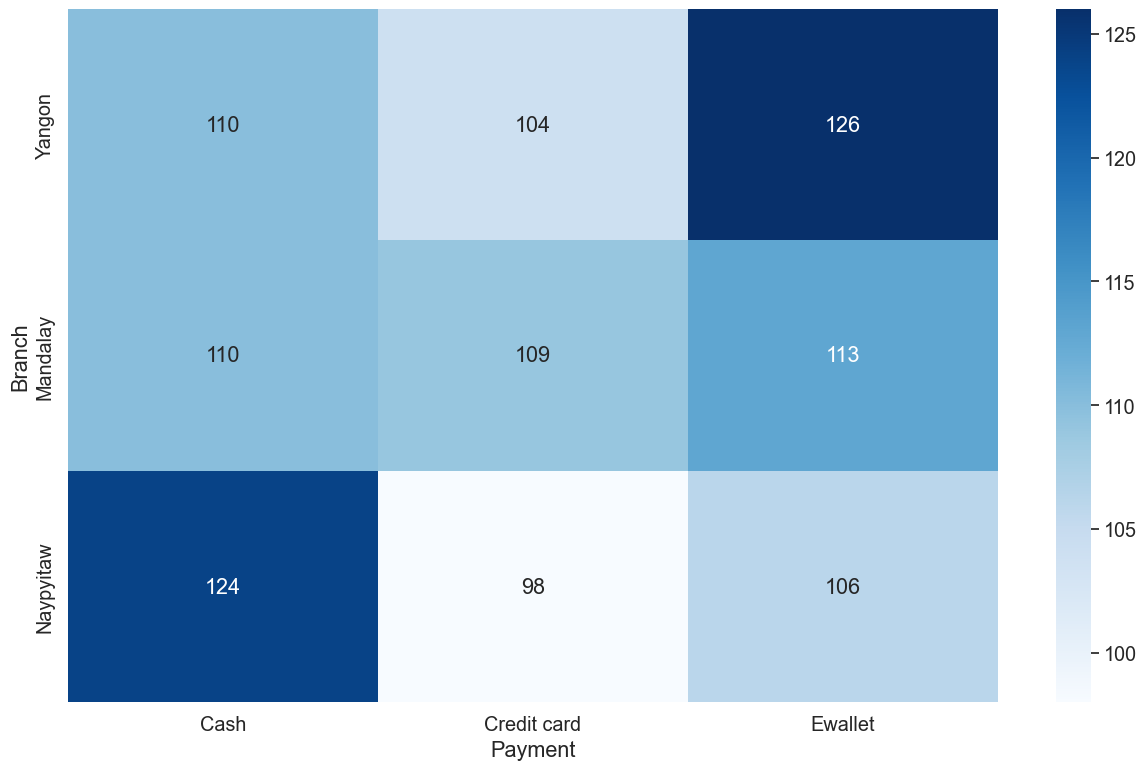

In [193]:
branch_mapping = {
    'A': 'Yangon',
    'B': 'Mandalay',
    'C': 'Naypyitaw'
}

branch_payment_pivot = data.pivot_table(index='Branch', columns='Payment', aggfunc='size')

branch_payment_pivot.index = branch_payment_pivot.index.map(branch_mapping)

sns.heatmap(branch_payment_pivot, annot=True, fmt='g', cmap='Blues')

plt.show()

<AxesSubplot:xlabel='Product_line', ylabel='Total'>

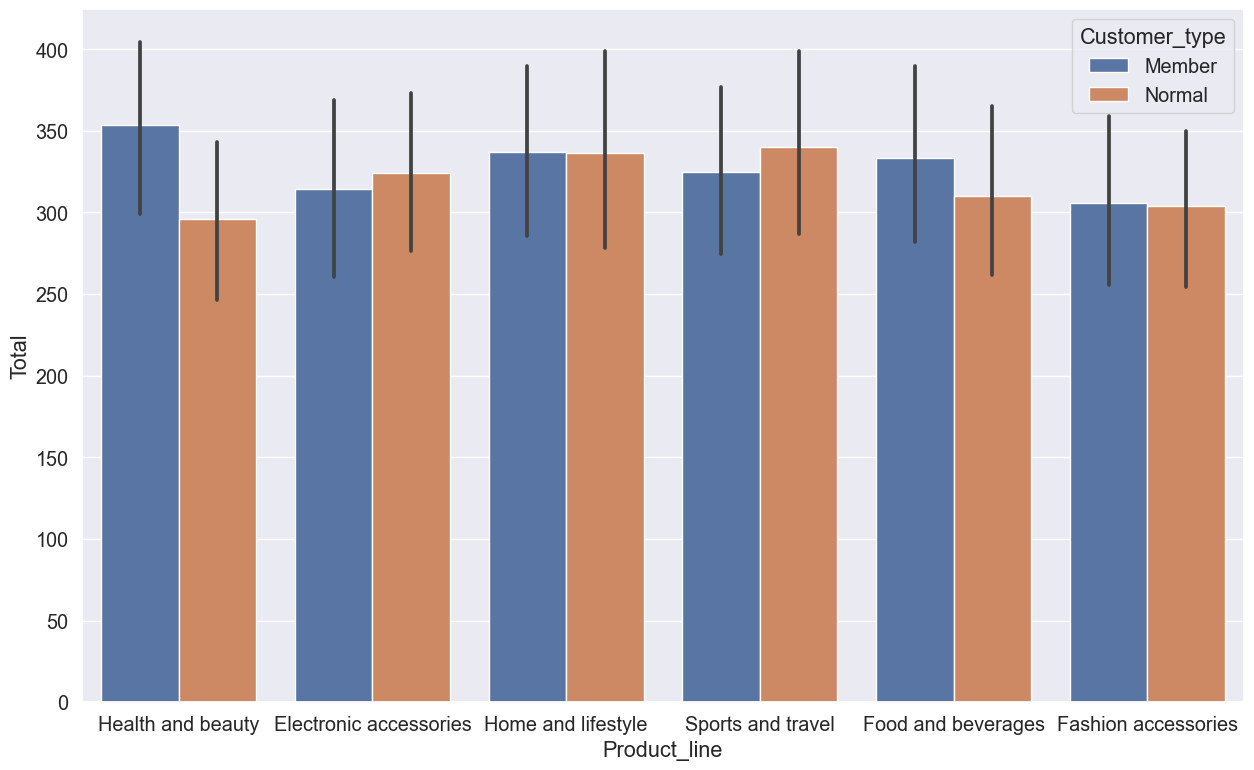

In [195]:
sns.barplot(x='Product_line', y='Total', hue='Customer_type', data=data)

<AxesSubplot:xlabel='Product_line', ylabel='count'>

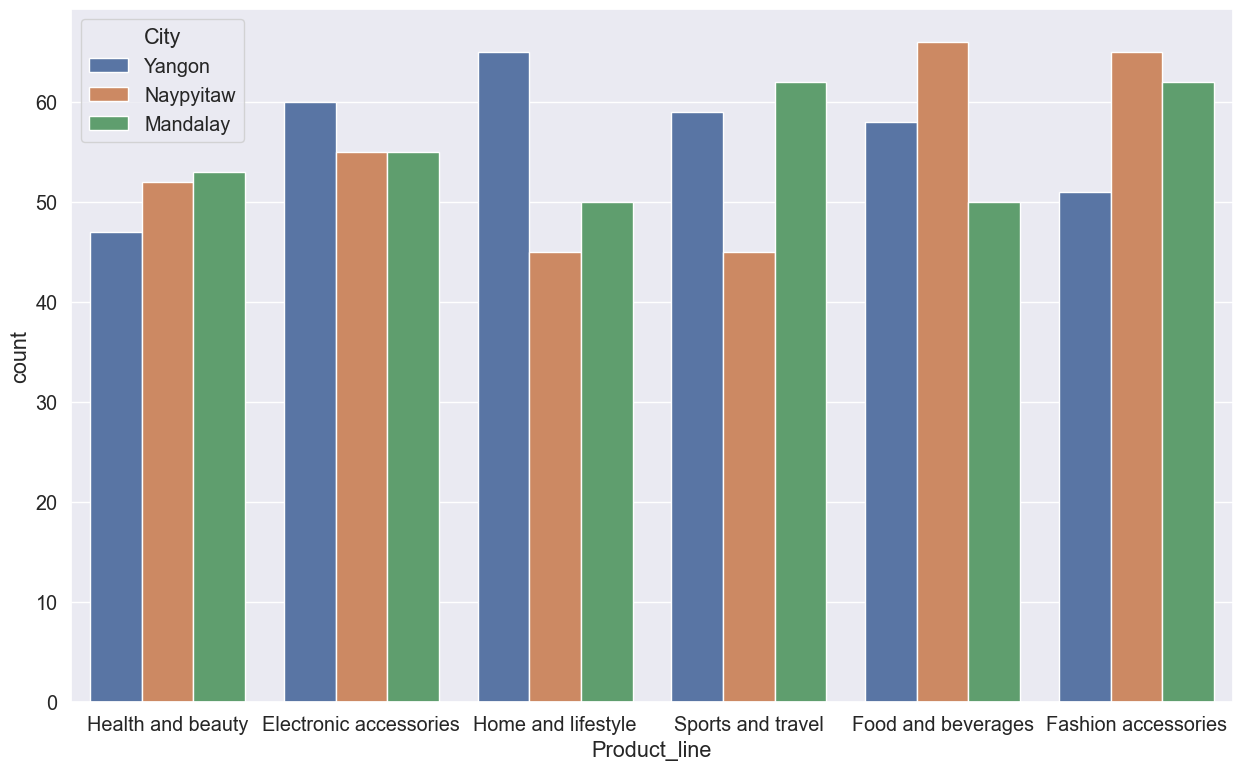

In [196]:
sns.countplot(x='Product_line', hue='City', data=data)

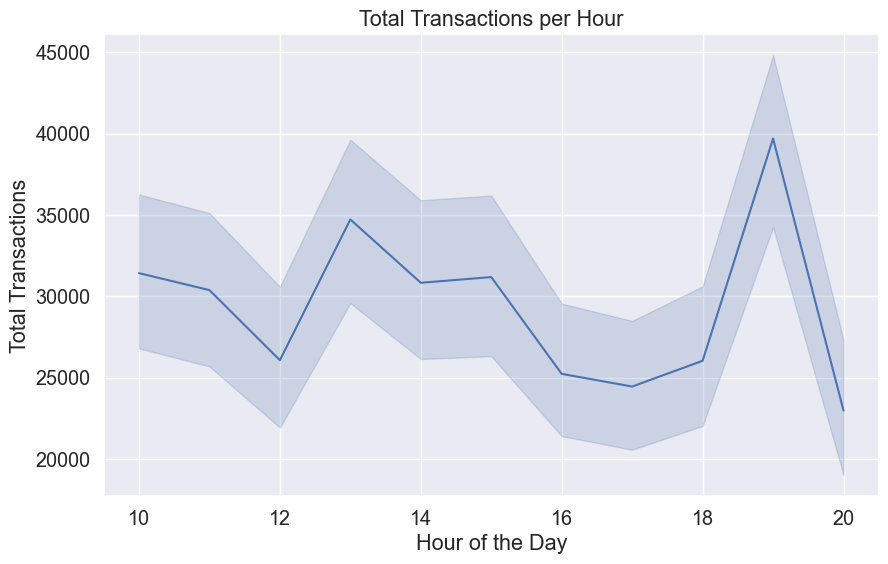

In [197]:
data['Hour'] = data['Time'].apply(lambda x: x.hour)

plt.figure(figsize=(10,6))
sns.lineplot(x='Hour', y='Total', data=data, estimator='sum')
plt.title('Total Transactions per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Transactions')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Product_line', ylabel='Rating'>

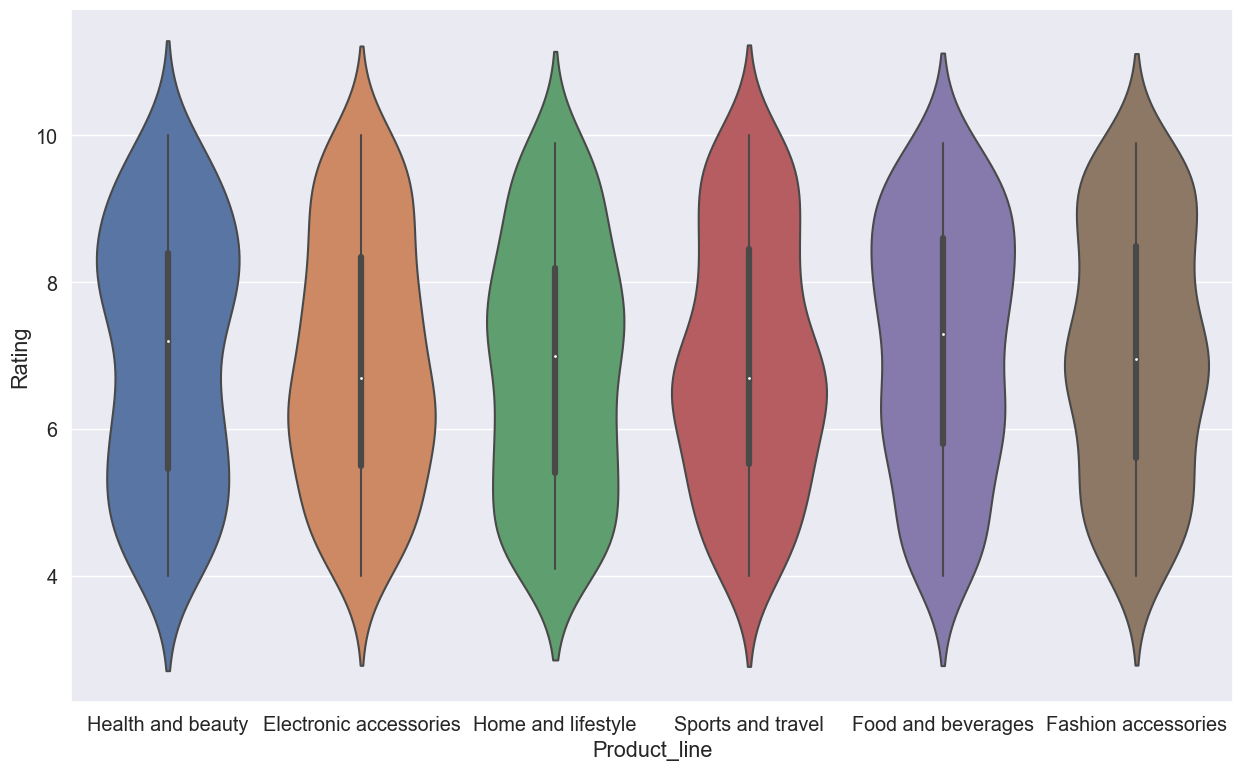

In [198]:
sns.violinplot(x='Product_line', y='Rating', data=data)

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

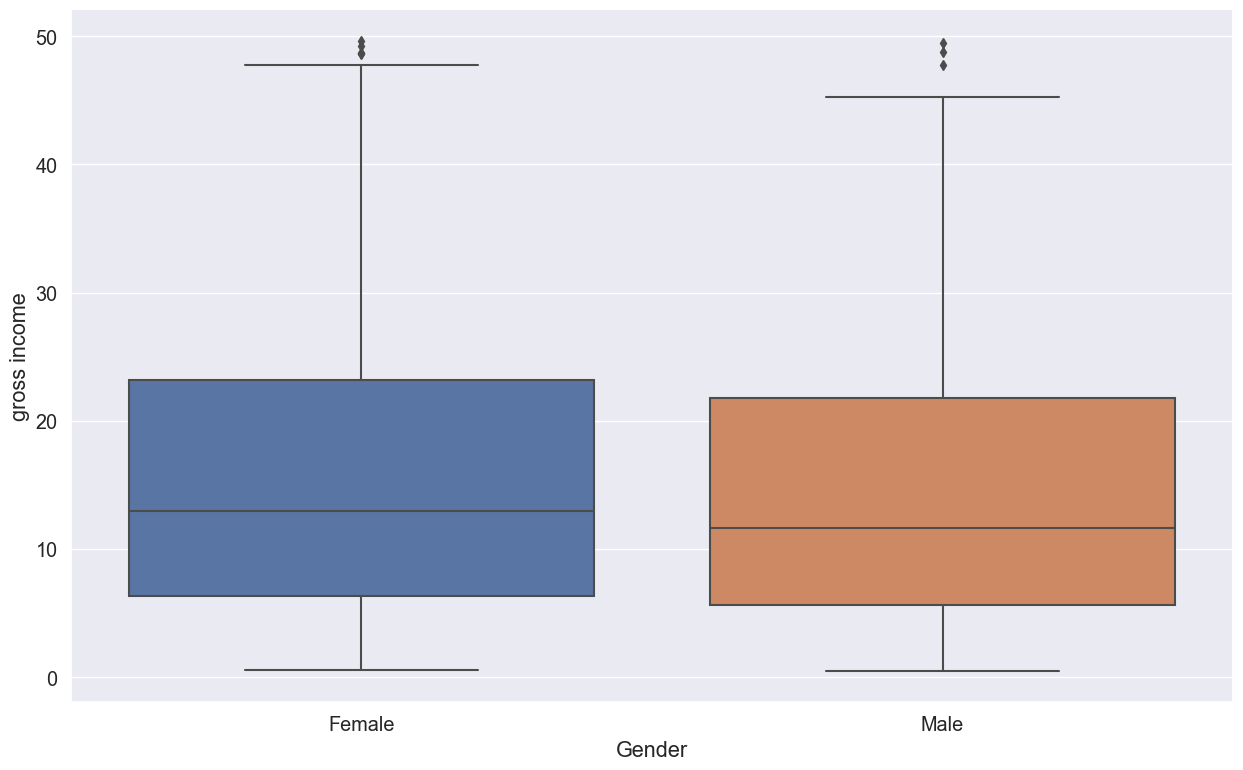

In [199]:
sns.boxplot(x='Gender', y='gross income', data=data)

<AxesSubplot:xlabel='City', ylabel='count'>

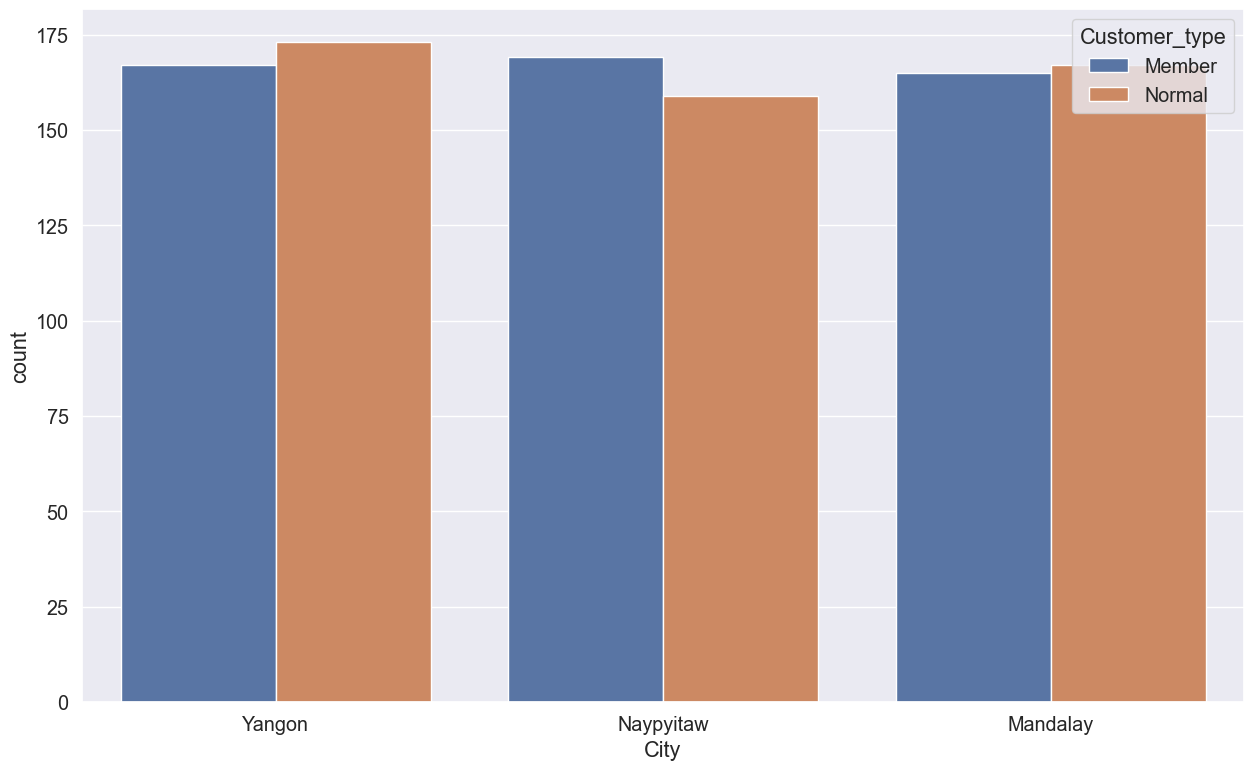

In [201]:
sns.countplot(x='City', hue='Customer_type', data=data)

# SQL Queries

In [202]:
#this is where to make the path of the file that will contain the work we doing to be saved
conn=sqlite3.connect(r'D:\VIF\Materials\Second Year\Training\Last Assignment\supermarket_sales - Sheet1.db')

In [203]:
#this is to upload the data to the sql
#                     name       ,
data.to_sql('Market',conn,if_exists = 'replace',index=False)
# index=True it will start from zero else it will start from one

1000

## Total >1000

In [204]:
query = """
SELECT Branch, City, Product_line, Total
FROM Market
WHERE Total > 1000
ORDER BY Total DESC;
"""

df =pd.read_sql_query(query,conn)
print(df.head())

  Branch       City         Product_line    Total
0      C  Naypyitaw  Fashion accessories  1042.65
1      A     Yangon  Fashion accessories  1039.29
2      C  Naypyitaw   Food and beverages  1034.46
3      C  Naypyitaw   Home and lifestyle  1023.75
4      B   Mandalay   Home and lifestyle  1022.49


## Total Money For Every Market

In [205]:
query = """
SELECT City, SUM(Total) AS TotalMoney
FROM Market
GROUP BY City
ORDER BY TotalMoney DESC;
"""

df =pd.read_sql_query(query,conn)
print(df.head())

        City   TotalMoney
0  Naypyitaw  110568.7065
1     Yangon  106200.3705
2   Mandalay  106197.6720


## Show Payment Type For every city

In [206]:
query = """
SELECT City, Payment, COUNT(*) AS Count
FROM Market
GROUP BY City, Payment
ORDER BY City, Count DESC;
"""

df =pd.read_sql_query(query,conn)
print(df.head(9))

        City      Payment  Count
0   Mandalay      Ewallet    113
1   Mandalay         Cash    110
2   Mandalay  Credit card    109
3  Naypyitaw         Cash    124
4  Naypyitaw      Ewallet    106
5  Naypyitaw  Credit card     98
6     Yangon      Ewallet    126
7     Yangon         Cash    110
8     Yangon  Credit card    104


## Payment Type Usage

In [207]:
query = """
SELECT Payment, COUNT(*) AS Count
FROM Market
GROUP BY Payment
ORDER BY Count DESC
"""

df =pd.read_sql_query(query,conn)
print(df.head(3))

       Payment  Count
0      Ewallet    345
1         Cash    344
2  Credit card    311


## Total Ratings For Every Branch

In [208]:
query = """
SELECT Branch, SUM(Rating) AS TotalRatings
FROM Market
GROUP BY Branch
ORDER BY TotalRatings DESC;
"""

df =pd.read_sql_query(query,conn)
print(df.head())

  Branch  TotalRatings
0      A        2389.2
1      C        2319.9
2      B        2263.6


## Money Every Gender Spend

In [209]:
query = """
SELECT Gender, COUNT(*) AS PurchaseCount, SUM(Total) AS TotalSpent
FROM Market
GROUP BY Gender
ORDER BY TotalSpent DESC;
"""

df =pd.read_sql_query(query,conn)
print(df.head())

   Gender  PurchaseCount  TotalSpent
0  Female            501  167882.925
1    Male            499  155083.824


## Quantity Sold From Every Product Line In Every Branch

In [210]:
query = """
SELECT Branch, Product_line, SUM(Quantity) AS TotalQuantity
FROM Market
GROUP BY Branch, Product_line
ORDER BY Branch, TotalQuantity DESC;
"""

df =pd.read_sql_query(query,conn)
print(df.head(80))

   Branch            Product_line  TotalQuantity
0       A      Home and lifestyle            371
1       A       Sports and travel            333
2       A  Electronic accessories            322
3       A      Food and beverages            313
4       A     Fashion accessories            263
5       A       Health and beauty            257
6       B       Sports and travel            322
7       B       Health and beauty            320
8       B  Electronic accessories            316
9       B     Fashion accessories            297
10      B      Home and lifestyle            295
11      B      Food and beverages            270
12      C      Food and beverages            369
13      C     Fashion accessories            342
14      C  Electronic accessories            333
15      C       Health and beauty            277
16      C       Sports and travel            265
17      C      Home and lifestyle            245


## Quantity Sold In Every Product Line

In [211]:
query = """SELECT Product_line, SUM(Quantity) AS TotalQuantity
FROM Market
GROUP BY Product_line
ORDER BY TotalQuantity DESC
"""

df =pd.read_sql_query(query,conn)
print(df.head(8))

             Product_line  TotalQuantity
0  Electronic accessories            971
1      Food and beverages            952
2       Sports and travel            920
3      Home and lifestyle            911
4     Fashion accessories            902
5       Health and beauty            854


## Transactions Made By Every Customer Type

In [215]:
query = """
SELECT Customer_type, COUNT(*) AS TotalCount
FROM Market
GROUP BY Customer_type
ORDER BY TotalCount DESC
"""

df = pd.read_sql_query(query, conn)
print(df.head())


  Customer_type  TotalCount
0        Member         501
1        Normal         499


# Label  Encoder

In [217]:
categorical_columns = ['Gender', 'Customer_type', 'Payment','Product_line','Branch','City']  # Add more columns as needed
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [218]:
dummy_date = '2024-01-01'  # or any arbitrary date

# Map weekdays to corresponding dates
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_to_date = {day: (pd.to_datetime(dummy_date) + pd.DateOffset(days=(i - pd.to_datetime(dummy_date).day_of_week) % 7)).strftime('%Y-%m-%d') for i, day in enumerate(weekdays)}

data['Weekday'] = data['Weekday'].map(weekday_to_date)
data['Weekday'] = pd.to_datetime(data['Weekday'], format='%Y-%m-%d')

In [219]:
data.dtypes

Invoice ID                         object
Branch                              int32
City                                int32
Customer_type                       int32
Gender                              int64
Product_line                        int32
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                             int32
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Day                                 int64
Month                               int64
Year                                int64
Weekday                    datetime64[ns]
Hour                                int64
Avg_price_per_unit                float64
dtype: object

In [220]:
# # Convert 'Date' column to datetime and extract useful features
# data['Date'] = pd.to_datetime(data['Date'])
# data['Day'] = data['Date'].dt.day
# data['Month'] = data['Date'].dt.month
# data['Year'] = data['Date'].dt.year
# data['Weekday'] = data['Date'].dt.weekday
# data['Hour'] = pd.to_datetime(data['Time']).dt.hour

# # Drop unnecessary columns: 'Invoice ID', 'Date', 'Time' (Invoice ID is a string and Date/Time are not needed)
# X = data.drop(columns=['Total', 'Date', 'Time', 'Invoice ID'])  # Features
# y = data['Total']  # Target (Total value to predict)

# # Ensure that all columns are numeric
# X = X.apply(pd.to_numeric, errors='coerce')

# # Split the dataset into training and testing sets (70% training, 30% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Create and train the linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test)

# # Calculate performance metrics
# mse = mean_squared_error(y_test, y_pred)
# rmse = mse ** 0.5
# r2 = r2_score(y_test, y_pred)

# # Print the model coefficients, intercept, and performance metrics
# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)
# print("R² (Coefficient of Determination):", r2)
# print("RMSE (Root Mean Squared Error):", rmse)